In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from facenet_models import FacenetModel
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import text
import skimage.io as io
from PIL import Image
import cv2 as cv

In [12]:
def find_eyes(image_data, *, box_threshold=0.97, prop_const=0.13):
    """
    Displays an image with boxes around people's faces and labels them with names.
    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    """
    model = FacenetModel()
    boxes, probabilities, landmarks = model.detect(image_data)
    face_detected = True

    
    if (boxes is None):
        face_detected = False
        return [], [], face_detected
    
    fig, ax = plt.subplots()
    ax.imshow(image_data)
    
    descriptors = model.compute_descriptors(image_data, boxes)
    
    eye_coords = []
    eye_boxes = []
    
    for box, prob, landmark in zip(boxes, probabilities, landmarks):
        if prob<box_threshold:
            continue
        lefteye = landmark[0]
        righteye = landmark[1]
        
              
        width_radius = ((box[3] - box[1]) + (box[2] - box[0]))/2 * prop_const
        height_radius = width_radius / 2
        
        # boxes in form [left,top,right,bottom]
        leftBox = [lefteye[0] - width_radius, 
                   lefteye[1] + height_radius, 
                   lefteye[0] + width_radius,
                   lefteye[1] - height_radius]
        rightBox = [righteye[0] - width_radius, 
                    righteye[1] + height_radius, 
                    righteye[0] + width_radius,
                    righteye[1] - height_radius]
        
        leftBox = np.array(leftBox)
        rightBox = np.array(rightBox)
        
        #ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
        ax.add_patch(Rectangle(leftBox[:2], *(leftBox[2:] - leftBox[:2]), fill=None, lw=2, color="yellow"))
        ax.add_patch(Rectangle(rightBox[:2], *(rightBox[2:] - rightBox[:2]), fill=None, lw=2, color="yellow"))
        
        for i in range(2):
            ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")
        
    return leftBox, rightBox, face_detected

Filepath: alan1.png


<IPython.core.display.Javascript object>


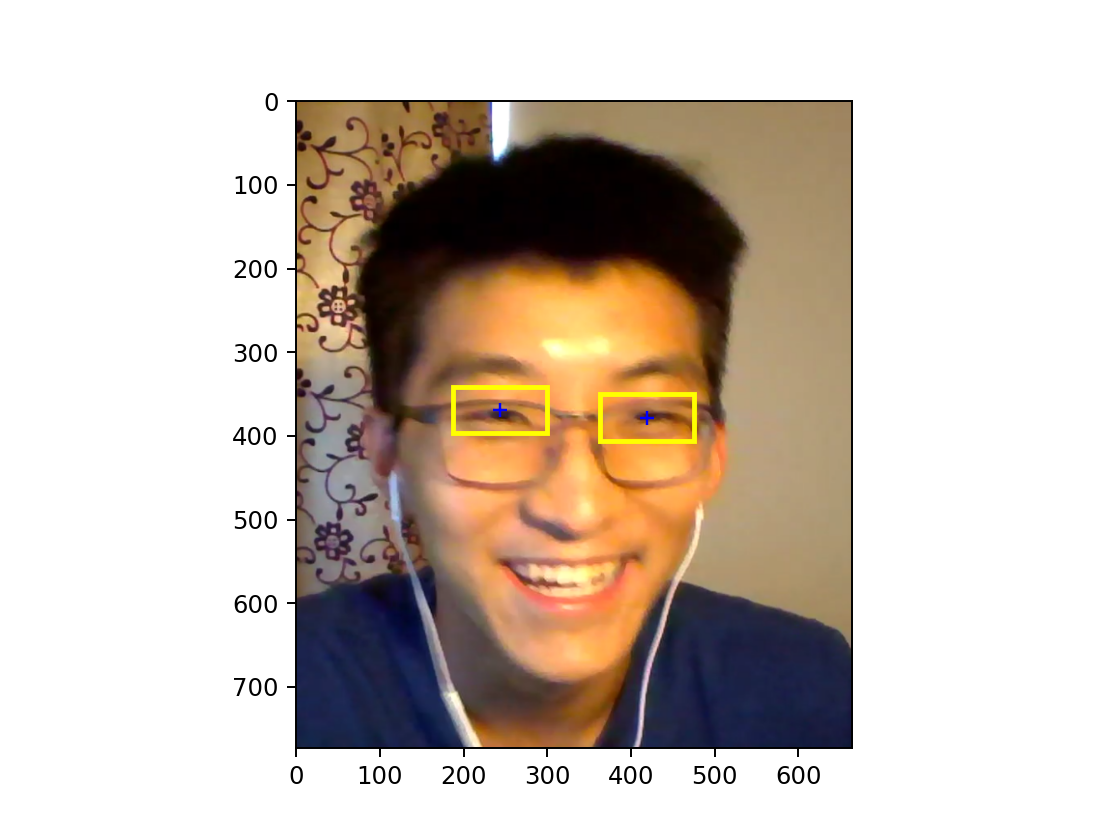

In [20]:
filepath = input("Filepath: ")
# pic = np.array(Image.open(filepath))[:,:,:3]
# shape-(Height, Width, Color)
pic = io.imread(str(filepath))
if pic.shape[-1] == 4:
    # Image is RGBA, where A is alpha -> transparency
    # Must make image RGB.
    pic = pic[..., :-1]  # png -> RGB
i = 0
face_detected = False
while (not face_detected and i < 4):
    leftBox, rightBox, face_detected = find_eyes(pic)
    pic = cv.rotate(pic, cv.ROTATE_90_CLOCKWISE)
    i += 1

In [ ]:
class CNN ():
    def __init__ (self, x):
        